# Latent Dirichlet Allocation for Text Data


* apply standard preprocessing techniques on Wikipedia text data
* use GraphLab Create to fit a Latent Dirichlet allocation (LDA) model
* explore and interpret the results, including topic keywords and topic assignments for documents


## Text Data Preprocessing
Use the Wikipedia dataset.

In [1]:
import graphlab as gl
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

'''Check GraphLab Create version'''
from distutils.version import StrictVersion
assert (StrictVersion(gl.version) >= StrictVersion('1.8.5')), 'GraphLab Create must be version 1.8.5 or later.'

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1547859154.log


This non-commercial license of GraphLab Create for academic use is assigned to emwyan@uw.edu and will expire on March 10, 2019.


In [3]:
# import wiki data
wiki = gl.SFrame('people_wiki.gl/')
wiki.head(4)

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...


### Data Processing

Preprocess the Wikipedia data in two steps: <BR>
(1) first, we will create a bag of words representation for each article<BR>
(2) remove the common words that don't help us to distinguish between documents

In [4]:

# create a bag of words representation for each article
wiki_docs = gl.text_analytics.count_words(wiki['text'])

# remove the common words that don't help us to distinguish between documents
wiki_docs = wiki_docs.dict_trim_by_keys(gl.text_analytics.stopwords(), exclude=True)

In [5]:
wiki_docs[0]

{'10': 1,
 '1979': 1,
 '19982000': 1,
 '2000': 1,
 '2001': 1,
 '2002': 1,
 '2003': 1,
 '2005': 1,
 '2006': 1,
 '2007': 1,
 '2008': 1,
 '2009': 1,
 '2011': 1,
 '2013': 1,
 '2014': 1,
 '21': 1,
 '32': 1,
 '44game': 1,
 'acted': 1,
 'afl': 1,
 'aflfrom': 1,
 'age': 1,
 'assistant': 1,
 'australia': 1,
 'australian': 3,
 'blues': 1,
 'born': 1,
 'box': 1,
 'brisbaneafter': 1,
 'bullants': 1,
 'career': 1,
 'carlton': 2,
 'carltons': 1,
 'club': 5,
 'clubs': 1,
 'coach': 2,
 'coached': 1,
 'coburg': 1,
 'college': 1,
 'continued': 1,
 'corey': 1,
 'david': 1,
 'delisted': 1,
 'digby': 1,
 'district': 1,
 'division': 1,
 'draft': 1,
 'drawn': 1,
 'early': 1,
 'edflhe': 1,
 'education': 1,
 'end': 2,
 'essendon': 1,
 'exchange': 1,
 'falcons': 1,
 'football': 10,
 'footballer': 1,
 'forward': 1,
 'game': 1,
 'games': 1,
 'goalkicker': 1,
 'goals': 1,
 'hawks': 1,
 'hill': 1,
 'kangaroos': 3,
 'kicked': 1,
 'leading': 2,
 'league': 4,
 'losing': 1,
 'mckernan': 1,
 'melbourne': 1,
 'morrell': 

## Model fitting and interpretation


In [6]:

topic_model = gl.topic_model.create(wiki_docs, num_topics=10, num_iterations=200)

Learning a topic model

Number of documents     59071

Vocabulary size    547462

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 13.24s        | 6.60269e+06    | 0               |

| 20        | 25.19s        | 6.79562e+06    | 0               |

| 30        | 37.18s        | 6.88809e+06    | 0               |

| 40        | 48.86s        | 6.91617e+06    | 0               |

| 50        | 1m 0s         | 6.5341e+06     | 0               |

| 60        | 1m 12s        | 6.80936e+06    | 0               |

| 70        | 1m 23s        | 6.13755e+06    | 0               |

| 80        | 1m 36s        | 5.84286e+06    | 0               |

| 90        | 1m 50s        | 5.87068e+06    | 0               |

| 100       | 2m 3s         | 5.68481e+06    | 0               |

| 110       | 2m 17s        | 7.0218e+06     | 0               |

| 120       | 2m 28s        | 6.91991e+06    | 0               |

| 130       | 2m 40s        | 6.92179e+06    | 0               |

| 140       | 2m 51s        | 6.81256e+06    | 0               |

| 150       | 3m 3s         | 6.69742e+06    | 0               |

| 160       | 3m 17s        | 5.2497e+06     | 0               |

| 170       | 3m 29s        | 6.95177e+06    | 0               |

| 180       | 3m 42s        | 5.96803e+06    | 0               |

| 190       | 3m 55s        | 6.84601e+06    | 0               |

| 200       | 4m 7s         | 6.72839e+06    | 0               |

+-----------+---------------+----------------+-----------------+

GraphLab provides a useful summary of the model we have fitted, including the hyperparameter settings for alpha, gamma (note that GraphLab Create calls this parameter beta), and K (the number of topics); the structure of the output data; and some useful methods for understanding the results.

In [59]:
topic_model

Class                          : TopicModel

Schema
------
Vocabulary Size                : 547462

Settings
--------
Number of Topics               : 10
alpha                          : 5.0
beta                           : 0.1
Iterations                     : 200
Training time                  : 363.9111
Verbose                        : False

Accessible fields             : 
m['topics']                   : An SFrame containing the topics.
m['vocabulary']               : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.


* get the top words in each topic and use these to identify topic themes
* predict topic distributions for some example documents

In [167]:
topic_model = gl.load_model('lda_assignment_topic_model')

In [109]:
topic_model

Class                          : TopicModel

Schema
------
Vocabulary Size                : 547462

Settings
--------
Number of Topics               : 10
alpha                          : 5.0
beta                           : 0.1
Iterations                     : 200
Training time                  : 363.9111
Verbose                        : False

Accessible fields             : 
m['topics']                   : An SFrame containing the topics.
m['vocabulary']               : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [25]:
sum(topic_model.get_topics(topic_ids = [2], output_type='topic_probabilities',num_words = 50)['score'])

0.21034366078939654

# Identifying topic themes by top words


In [168]:
topic_model.get_topics(topic_ids = [2], output_type='topic_probabilities',num_words = 50)

topic,word,score
2,film,0.0161482004927
2,music,0.0114820618908
2,album,0.00996964339687
2,released,0.00890297536304
2,band,0.00790751347298
2,television,0.00688570530973
2,series,0.00616153882748
2,show,0.00570581950729
2,award,0.00500159074529
2,appeared,0.00492611223289


In [32]:
[x['words'] for x in topic_model.get_topics(output_type='topic_words', num_words=10)]

[['university',
  'research',
  'professor',
  'international',
  'institute',
  'science',
  'society',
  'studies',
  'director',
  'national'],
 ['played',
  'season',
  'league',
  'team',
  'career',
  'football',
  'games',
  'player',
  'coach',
  'game'],
 ['film',
  'music',
  'album',
  'released',
  'band',
  'television',
  'series',
  'show',
  'award',
  'appeared'],
 ['university',
  'school',
  'served',
  'college',
  'state',
  'american',
  'states',
  'united',
  'born',
  'law'],
 ['member',
  'party',
  'election',
  'minister',
  'government',
  'elected',
  'served',
  'president',
  'general',
  'committee'],
 ['work',
  'art',
  'book',
  'published',
  'york',
  'magazine',
  'radio',
  'books',
  'award',
  'arts'],
 ['company',
  'business',
  'years',
  'group',
  'time',
  'family',
  'people',
  'india',
  'million',
  'indian'],
 ['world',
  'won',
  'born',
  'time',
  'year',
  'team',
  'championship',
  'tour',
  'championships',
  'title'],
 ['born

Proposed themes:

- topic 0: Science and research
- topic 1: Team sports
- topic 2: Music, TV, and film
- topic 3: American college and politics
- topic 4: General politics
- topic 5: Art and publishing
- topic 6: Business
- topic 7: International athletics
- topic 8: Great Britain and Australia
- topic 9: International music

We'll save these themes for later:

In [169]:
themes = ['science and research','team sports','music, TV, and film','American college and politics','general politics', \
         'art and publishing','Business','international athletics','Great Britain and Australia','international music']

### Measuring the importance of top words


 - the weights of the top 100 words, sorted by the size
 - the total weight of the top 10 words


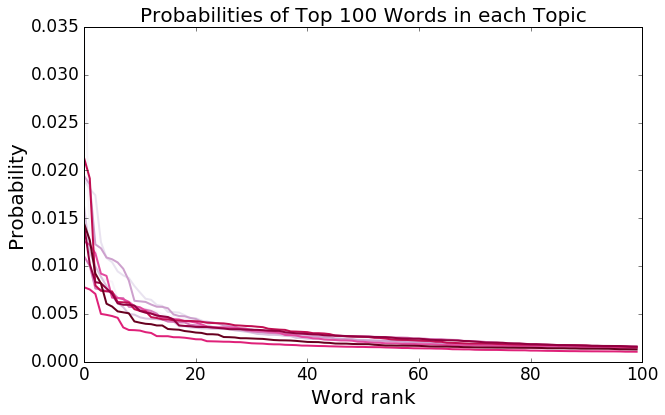

In [38]:
import matplotlib.pylab as pl
colors = pl.cm.PuRd(np.linspace(0,1,10))

plt.figure(figsize = (10,6))

for i in range(10):
    plt.plot(range(100), topic_model.get_topics(topic_ids=[i], num_words=100)['score'],
            color = colors[i], linewidth = 2)
plt.xlabel('Word rank', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Probabilities of Top 100 Words in each Topic', fontsize = 20)
plt.savefig('top_100_word_weight.png')

In the above plot, each line corresponds to one of our ten topics. Notice how for each topic, the weights drop off sharply as we move down the ranked list of most important words. This shows that the top 10-20 words in each topic are assigned a much greater weight than the remaining words (total vocabulary 547462 )


Next we plot the total weight assigned by each topic to its top 10 words: 

In [56]:
import numpy as np

In [58]:
themes

['science and research',
 'team sports',
 'music, TV, and film',
 'American college and politics',
 'general politics',
 'art and publishing',
 'Business',
 'international athletics',
 'Great Britain and Australia',
 'international music']

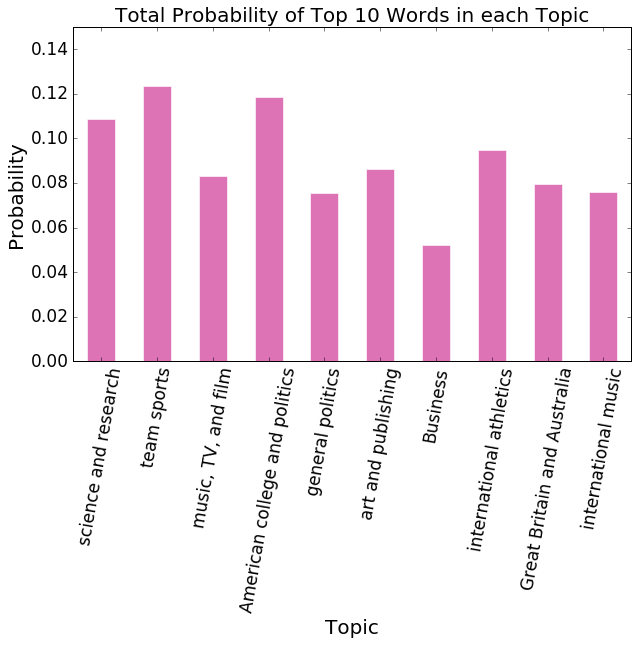

In [64]:
top_probs = [sum(topic_model.get_topics(topic_ids=[i], num_words=10)['score']) for i in range(10)]

ind = np.arange(10)
width = 0.5
plt.figure()
fig, ax = plt.subplots(figsize = (10,6))

ax.bar(ind-(width/2),top_probs,width, color= 'mediumvioletred', alpha = 0.6,
      edgecolor = 'white')
ax.set_xticks(ind)
ax.set_xticklabels(themes, rotation = 80, fontsize = 17)
plt.xlabel('Topic', fontsize = 20)
plt.ylabel('Probability', fontsize = 20)
plt.yticks(fontsize = 17)
plt.title('Total Probability of Top 10 Words in each Topic', fontsize = 20)
plt.xlim(-0.5,9.5)
plt.ylim(0,0.15)
plt.show()
plt.savefig('top_10_words_prob.png')

Here we see that, for our topic model, the top 10 words only account for a small fraction (in this case, between 5% and 13%) of their topic's total probability mass. So while we can use the top words to identify broad themes for each topic, we should keep in mind that in reality these topics are more complex than a simple 10-word summary.

Finally, we observe that some 'junk' words appear highly rated in some topics despite our efforts to remove unhelpful words before fitting the model; for example, the word 'born' appears as a top 10 word in three different topics, but it doesn't help us describe these topics at all.

# Topic distributions for some example documents

LDA allows for mixed membership, which means that each document can partially belong to several different topics. For each document, topic membership is expressed as a vector of weights that sum to one; the magnitude of each weight indicates the degree to which the document represents that particular topic.

In [170]:
hawking = gl.SArray([wiki_docs[int(np.where(wiki['name']=='Stephen Hawking')[0])]])
pred1 = np.round(topic_model.predict(hawking, output_type='probability'),3)
pred2 = np.round(topic_model.predict(hawking, output_type='probability'),3)

rank = np.argsort(pred1)[0][::-1]
print(gl.SFrame({'topics':np.array(themes)[rank], 'predictions':np.array(pred1[0])[rank], 
                 'predictions ':np.array(pred2[0])[rank]}))

+-------------+--------------+-------------------------------+
| predictions | predictions  |             topics            |
+-------------+--------------+-------------------------------+
|    0.395    |    0.422     |      science and research     |
|    0.097    |     0.07     |       art and publishing      |
|    0.097    |    0.086     |        general politics       |
|    0.086    |    0.049     |            Business           |
|    0.076    |     0.07     |    international athletics    |
|     0.07    |    0.086     |  Great Britain and Australia  |
|    0.054    |    0.097     | American college and politics |
|    0.049    |    0.043     |      music, TV, and film      |
|    0.038    |    0.043     |      international music      |
|    0.038    |    0.032     |          team sports          |
+-------------+--------------+-------------------------------+
[10 rows x 3 columns]



In [171]:
def average_predictions(model, test_document, num_trials=100):
    avg_preds = np.zeros((model.num_topics))
    for i in range(num_trials):
        avg_preds += model.predict(test_document, output_type='probability')[0]
    avg_preds = np.round(avg_preds/num_trials,2)
    
    result = gl.SFrame({'topics':themes, 'average predictions':avg_preds})
    result = result.sort('average predictions', ascending=False)
    
    return result

In [172]:
print average_predictions(topic_model, hawking, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|         0.41        |      science and research     |
|         0.1         |  Great Britain and Australia  |
|         0.08        |       art and publishing      |
|         0.08        |    international athletics    |
|         0.07        | American college and politics |
|         0.07        |        general politics       |
|         0.06        |            Business           |
|         0.04        |      music, TV, and film      |
|         0.04        |          team sports          |
|         0.04        |      international music      |
+---------------------+-------------------------------+
[10 rows x 2 columns]



In [110]:
cameron = gl.SArray([wiki_docs[int(np.where(wiki['name']=='James Cameron')[0])]])

To get a more robust estimate of the topics for each document, we can average a large number of predictions for the same document:

In [116]:
print average_predictions(topic_model, cameron, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|         0.29        |      music, TV, and film      |
|         0.16        |            Business           |
|         0.11        |  Great Britain and Australia  |
|         0.09        |      science and research     |
|         0.07        |       art and publishing      |
|         0.07        |    international athletics    |
|         0.06        |          team sports          |
|         0.05        | American college and politics |
|         0.04        |        general politics       |
|         0.04        |      international music      |
+---------------------+-------------------------------+
[10 rows x 2 columns]



In [165]:
portman = gl.SArray([wiki_docs[int(np.where(wiki['name']=='Natalie Portman')[0])]])

In [166]:
print average_predictions(topic_model, portman, 100)

+---------------------+-------------------------------+
| average predictions |             topics            |
+---------------------+-------------------------------+
|         0.44        |      music, TV, and film      |
|         0.09        |      science and research     |
|         0.09        |  Great Britain and Australia  |
|         0.07        |      international music      |
|         0.07        |    international athletics    |
|         0.06        | American college and politics |
|         0.06        |       art and publishing      |
|         0.04        |        general politics       |
|         0.04        |            Business           |
|         0.03        |          team sports          |
+---------------------+-------------------------------+
[10 rows x 2 columns]



# The Effect of  hyperparameters &gamma; and &alpha;

Finally, we'll take a look at the effect of the LDA model hyperparameters alpha and gamma on the characteristics of our fitted model:

- &alpha; is a parameter of the prior distribution over topic weights in each document 
- &gamma; is a parameter of the prior distribution over word weights in each topic. 

&alpha; and &gamma; are smoothing parameters when we compute how much each document "likes" a topic (in the case of &alpha;) or how much each topic "likes" a word (in the case of &gamma;). In both cases, these parameters serve to reduce the differences across topics or words in terms of these calculated preferences; &alpha; makes the document preferences "smoother" over topics, and &gamma; makes the topic preferences "smoother" over words.


__Quiz Question:__ What was the value of gamma used to fit our original topic model? Remember that GraphLab Create uses "beta" instead of "gamma" to refer to the hyperparameter that influences topic distributions over words.

We'll start by loading some topic models that have been trained using different settings of alpha and gamma. Specifically, we will start by comparing the following two models to our original topic model:
 - tpm_low_alpha, a model trained with alpha = 1 and default gamma
 - tpm_high_alpha, a model trained with alpha = 50 and default gamma

In [119]:
tpm_low_alpha = gl.load_model('lda_low_alpha')
tpm_high_alpha = gl.load_model('lda_high_alpha')

### Changing the hyperparameter &alpha;

The bigger &alpha; is, the more extreme topic assignment proportion difference is for each document

In [153]:
a = np.sort(tpm_low_alpha.predict(obama,output_type='probability')[0])[::-1]
b = np.sort(topic_model.predict(obama,output_type='probability')[0])[::-1]
c = np.sort(tpm_high_alpha.predict(obama,output_type='probability')[0])[::-1]
ind = np.arange(len(a))
width = 0.3

def param_bar_plot(a,b,c,ind,width,ylim,param,xlab,ylab, title):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    colors = pl.cm.PuRd(np.linspace(0,1,3))
    b1 = ax.bar(ind, a, width, color = colors[0], alpha = 0.7)
    b2 = ax.bar(ind+width, b, width,color =  colors[1], alpha = 0.7)
    b3 = ax.bar(ind+(2*width), c, width, color = colors[2], alpha = 0.7)

    ax.set_xticks(ind+width,)
    ax.set_xticklabels(range(10), fontsize = 17)
    ax.set_ylabel(ylab ,fontsize = 20)
    ax.set_xlabel(xlab ,fontsize = 20)
    ax.set_ylim(0,ylim)
    ax.legend(handles = [b1,b2,b3],labels=['low '+param,'original model','high '+param],
              fontsize = 17)
    ax.set_title(title,fontsize = 20 )

    plt.tight_layout()
    plt.savefig(title+'.png')
    


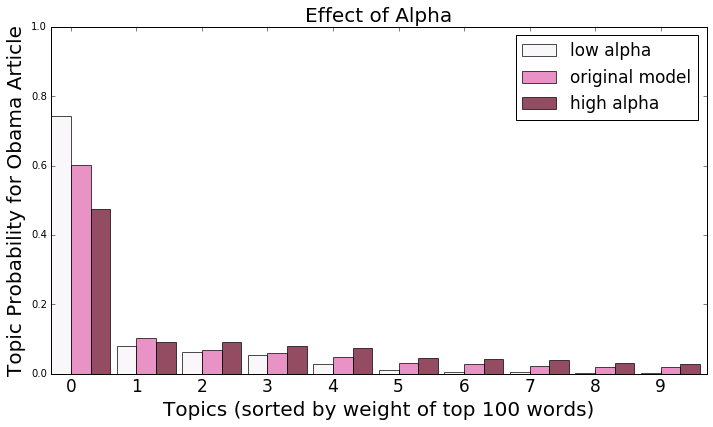

In [154]:
param_bar_plot(a,b,c,ind,width,ylim=1.0,param='alpha',
               xlab='Topics (sorted by weight of top 100 words)',
               ylab='Topic Probability for Obama Article',
              title= 'Effect of Alpha')

### Changing the hyperparameter &gamma;

plot the (sorted) total weights of the top 100 words and bottom 1000 from each topic in the high, original, and low &gamma; models.

Now we will consider the following two models:
 - tpm_low_gamma, a model trained with gamma = 0.02 and default alpha
 - tpm_high_gamma, a model trained with gamma = 0.5 and default alpha

In [155]:
del tpm_low_alpha
del tpm_high_alpha
tpm_low_gamma = gl.load_model('lda_low_gamma')
tpm_high_gamma = gl.load_model('lda_high_gamma')

In [156]:
a_top

array([ 0.43711624,  0.42324155,  0.42015463,  0.40663683,  0.4006247 ,
        0.38482939,  0.33106907,  0.31397317,  0.29481334,  0.25552301])

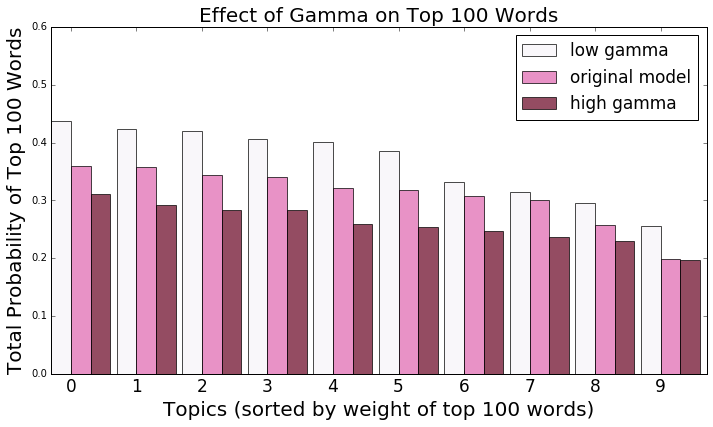

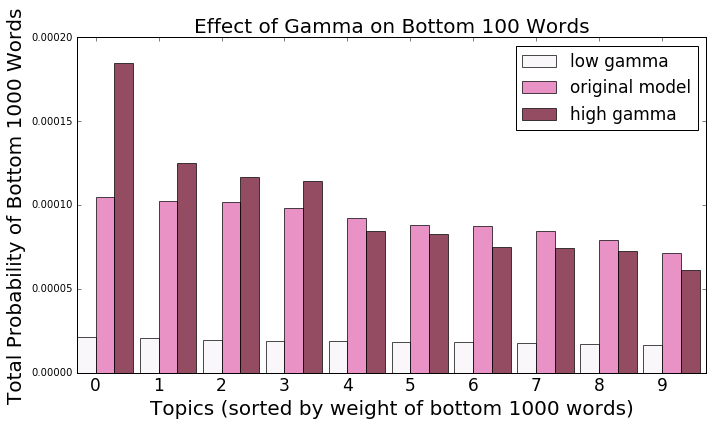

In [160]:
a_top = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
b_top = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
c_top = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]

a_bot = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
b_bot = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
c_bot = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]

ind = np.arange(len(a))
width = 0.3
    
param_bar_plot(a_top, b_top, c_top, ind, width, ylim=0.6, param='gamma',
               xlab='Topics (sorted by weight of top 100 words)', 
               ylab='Total Probability of Top 100 Words', 
               title = 'Effect of Gamma on Top 100 Words')

param_bar_plot(a_bot, b_bot, c_bot, ind, width, ylim=0.0002, param='gamma',
               xlab='Topics (sorted by weight of bottom 1000 words)',
               ylab='Total Probability of Bottom 1000 Words',
             title = 'Effect of Gamma on Bottom 100 Words')

From these two plots we can see that the low gamma model results in higher weight placed on the top words and lower weight placed on the bottom words for each topic, while the high gamma model places relatively less weight on the top words and more weight on the bottom words. Thus increasing gamma results in topics that have a smoother distribution of weight across all the words in the vocabulary.